#  Project 2: Harris Corner Detection and Matching

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure
from student_code import harris_corners, get_keypoints, get_features

## Open Two images for matching. Convert them into grayscale
### Take two similar images and add the photos to folder data. Rename these images as img1.jpg, and img2.jpg

In [22]:
img1_orig = cv2.imread('../data/plane.bmp')
img2_orig = cv2.imread('../data/plane_mirror.bmp')


img1= np.float32(cv2.cvtColor(img1_orig,cv2.COLOR_BGR2GRAY))
img2= np.float32(cv2.cvtColor(img2_orig,cv2.COLOR_BGR2GRAY))



# Get Harris Corners, normalize the corner values between 0 and 255. 

In [23]:
corners1, Ix1, Iy1 = harris_corners(img1, window_size=3, alpha=0.04, threshold=1e-3, nms_size=5)
corners2, Ix2, Iy2 = harris_corners(img2, window_size=3, alpha=0.04, threshold=1e-3, nms_size=5)

corners1 = cv2.normalize(corners1, corners1, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
corners2 = cv2.normalize(corners2, corners2, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)




In [24]:
image = img1.copy()
window_size=5
alpha=0.04
threshold=1e-2
nms_size=10


image = cv2.GaussianBlur(image,(5,5),1)
    
der_x = np.array([[0,0,0],[0,0,1],[0,0,0]])
der_y = np.array([[0,1,0],[0,0,0],[0,0,0]])
    
ix = cv2.filter2D(image,-1,der_x) - image
iy = cv2.filter2D(image,-1,der_y) - image
    
ixx = cv2.GaussianBlur(ix * ix,(window_size,window_size),8)
iyy = cv2.GaussianBlur(iy * iy,(window_size,window_size),8)
ixy = cv2.GaussianBlur(ix * iy,(window_size,window_size),8)
    
det_M = ixx * iyy - ixy**2
trace_M = ixx + iyy
R = det_M - alpha*(trace_M)**2
    
R[R<threshold*np.max(R)]=0
    
    
for i in range(R.shape[0]-nms_size):
    for j in range(R.shape[1]-nms_size):
        nms_window = R[i:i+nms_size,j:j+nms_size]
        nms_window[nms_window!=np.max(nms_window)]=0
        R[i:i+nms_size,j:j+nms_size]=nms_window
    
corners = R
Ix = ix
Iy = iy

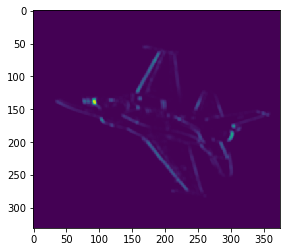

In [25]:
plt.imshow(ixx)

# Set the threshold for corners and generate key points from these corners

In [26]:
threshold = 5
kp1 = get_keypoints(corners1, Ix1, Iy1, threshold)
kp2 = get_keypoints(corners2, Ix2, Iy2, threshold)
kp1[0]

<KeyPoint 0x7f39c0891930>

# Draw the key points. The line (radius) depicts the gradient

True

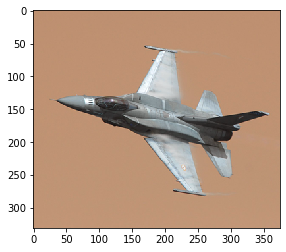

In [27]:
plt.imshow(img1_orig)
cv2.imwrite('../results/blox_corner.png',img1_orig)

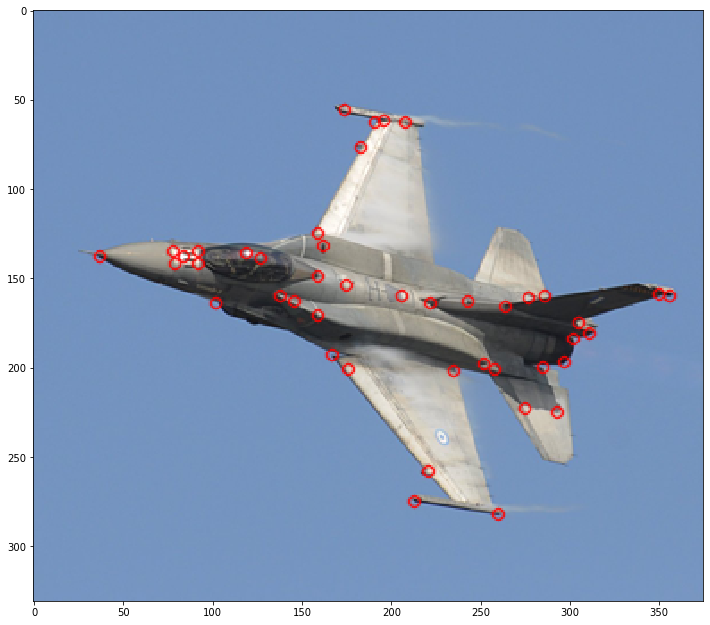

In [28]:
cv2.drawKeypoints(img1_orig, kp1, img1_orig, color=(0,0,255))
                         
plotFigure(img1_orig,12)
plt.show()   

True

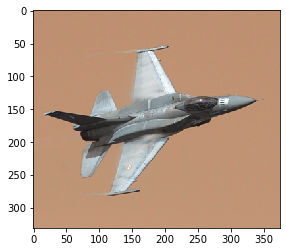

In [29]:
plt.imshow(img2_orig)
cv2.imwrite('../results/blox_flipped_corner.png',img2_orig)

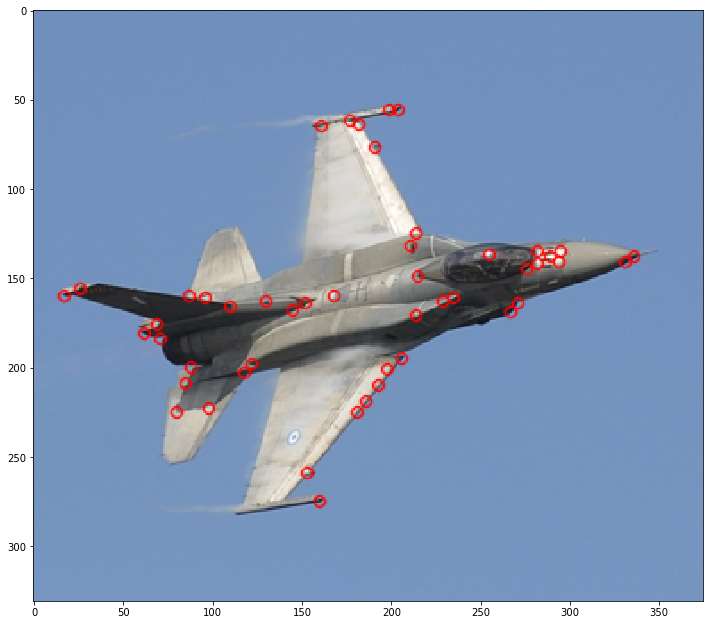

In [30]:
cv2.drawKeypoints(img2_orig, kp2, img2_orig,color=(0,0,255))
plotFigure(img2_orig,12)
plt.show()   

# From these key points, generate ORB descriptors. Then match these descriptors



In [31]:
orb = cv2.ORB_create()

# create sift instance
# sift = cv2.xfeatures2d.SIFT_create()
# get descriptors
descriptors1 = orb.compute(img1_orig, kp1)[1]
descriptors2 = orb.compute(img2_orig, kp2)[1]




In [32]:
print(descriptors1)

[[130 129 160 ... 124  49 208]
 [189   0 235 ... 170 240  32]
 [113 196 111 ... 184 240  96]
 ...
 [130 192  40 ...  21  61 236]
 [  2  64  98 ... 127 177 208]
 [191  81 182 ... 126  48 199]]


In [33]:
# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:10], img3, flags=2)

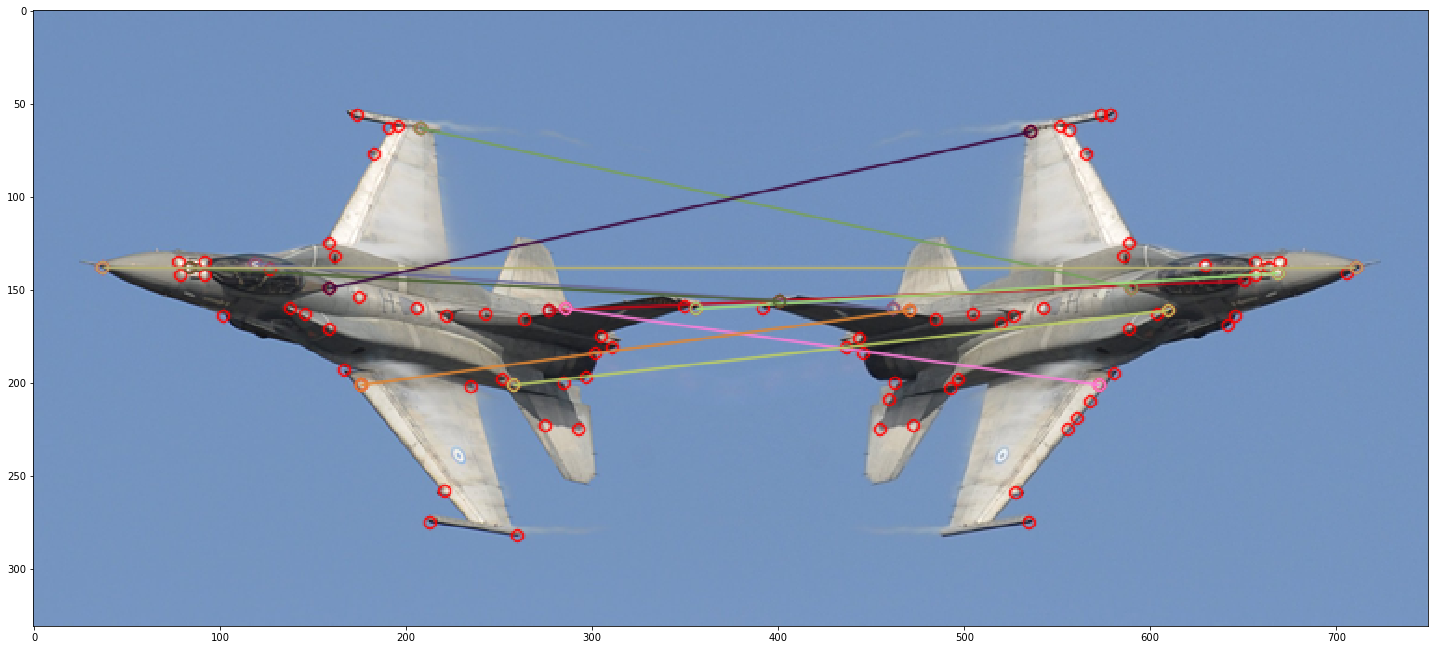

True

In [34]:
plotFigure(img3,25)
plt.show() 
cv2.imwrite('../results/blox_matched.png', img3)


## Custom SIFT descriptor

In [35]:
import math

In [36]:
descriptors1 = get_features(img1, kp1, 16)
descriptors2 = get_features(img2, kp2, 16)

NameError: name 'binary_2_decimal' is not defined

In [19]:
descriptors1 = np.float32(descriptors1)
descriptors2 = np.float32(descriptors2)

# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:10], img3, flags=2)





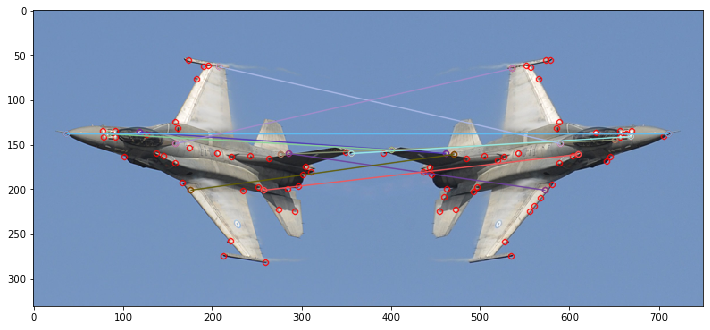

True

In [20]:
plotFigure(img3,12)
plt.show() 
cv2.imwrite('../results/matched_SIFT.png', img3)
